<a href="https://colab.research.google.com/github/Deepak4053/Image_Style_Transfer/blob/main/Handwrittendigit_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models


In [ ]:
(x_train,y_train), (x_test,y_test) =tf.keras.datasets.mnist.load_data()
x_train,x_test =x_train/255.0,x_test/255.0
x_train=x_train[...,np.newaxis]
x_test=x_test[...,np.newaxis]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


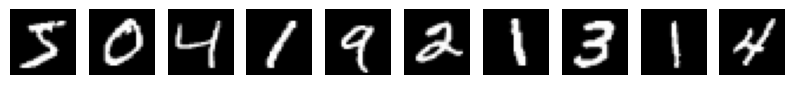

In [ ]:

# Plot the first 5 images in the training set
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output units for the 10 digit classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
training = model.fit(x_train, y_train, epochs=15, batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8763 - loss: 0.4166 - val_accuracy: 0.9812 - val_loss: 0.0582
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9821 - loss: 0.0570 - val_accuracy: 0.9873 - val_loss: 0.0373
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0359 - val_accuracy: 0.9892 - val_loss: 0.0329
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: 0.0275 - val_accuracy: 0.9890 - val_loss: 0.0321
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9902 - val_loss: 0.0293
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0162 - val_accuracy: 0.9888 - val_loss: 0.0355
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9900 - val_loss: 0.0337
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9957 - loss: 0.0131 - val_accuracy: 0

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 0s - 1ms/step - accuracy: 0.9916 - loss: 0.0361
Test accuracy: 0.991599977016449


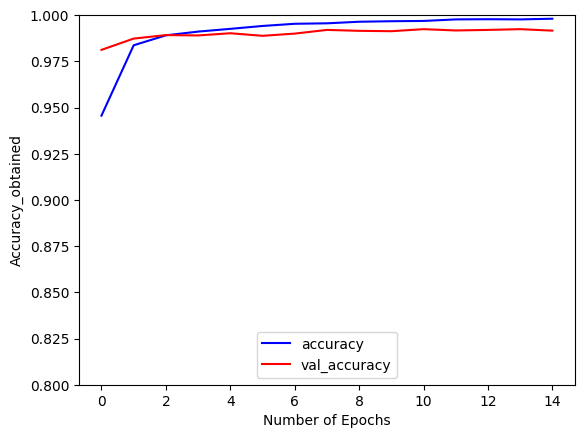

In [ ]:

plt.plot(training.history['accuracy'], label='accuracy', color='blue')
plt.plot(training.history['val_accuracy'], label='val_accuracy', color='red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy_obtained')
plt.ylim([0.8, 1])
plt.legend(loc='lower center' )
plt.show()


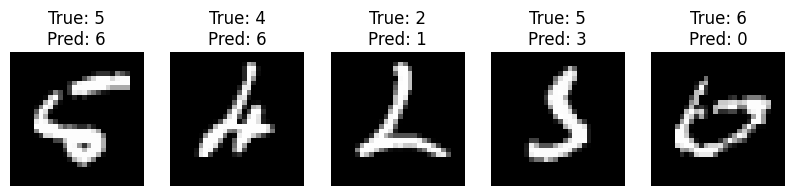

In [ ]:

# Find indices where the prediction does NOT match the true label
incorrect_indices = np.where(test_predicted_labels != y_test)[0]

#  incorrectly classified test images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    idx = incorrect_indices[i]
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {test_predicted_labels[idx]}")
    plt.axis('off')
plt.show()
